# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>**Grade 4 Math**, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [3]:
#I think I should not do this. 2019 data went missing
# df.rename({
#     'GRADES_PK_G':'ENROLL_PREK',
#     'GRADES_KG_G':'ENROLL_KINDER',
#     'GRADES_4_G':'ENROLL_4',
#     'GRADES_8_G':'ENROLL_8',
#     'GRADES_12_G':'ENROLL_12',
#     'GRADES_1_8_G':'ENROLL_PRIMARY',
#     'GRADES_9_12_G':'ENROLL_HS',
#     'GRADES_ALL_G':'ENROLL_ALL',
#     'ENROLL':'ENROLL_ALL_EST'
#     },
#     axis=1,inplace=True)


# df.dropna(axis = 0)

# do not drop NAs right now

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *Grade 4 Math*

How many years of data are logged in our dataset? 

In [4]:
df.YEAR.max() - df.YEAR.min()

#from 1986 to 2019

33

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [5]:
df_1 = df[df.STATE == "MICHIGAN"]
df_1.dropna(how='any', inplace=True)
print(df_1.AVG_MATH_4_SCORE.mean())

df_2 = df[df.STATE == "OHIO"]
df_2.dropna(how = 'any', inplace = True)
print(df_2.AVG_MATH_4_SCORE.mean())

#OHIO had higher outcome scores across all years

236.71428571428572
243.28571428571428


C:\Users\benja\AppData\Local\Temp\ipykernel_3972\769357524.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.dropna(how='any', inplace=True)
C:\Users\benja\AppData\Local\Temp\ipykernel_3972\769357524.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.dropna(how = 'any', inplace = True)


Dropping NAs has been very difficult in python. I am surprised. I do like python more for ML coding but R is really easy to tidy tibbles and dataframes. 

Find the average for your outcome score across all states in 2019

In [6]:
df_2019 = df[df.YEAR == 2019]

print(df_2019.AVG_MATH_4_SCORE.mean())
# I recovered the lost data and now we have a mean

239.9433962264151


Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [7]:
df.groupby('STATE')["AVG_MATH_4_SCORE"].max()

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [8]:
#df['AVG_LOCAL_REVENUE_PER_STATE'] = df.dropna(subset = ['LOCAL_REVENUE']).groupby('STATE')['LOCAL_REVENUE'].mean()
#this will not suffice. I will drop NAs before Machine Learning Model but I will keep NAs to have the same dimension before pre-processing

df['REVENUE_EXPENDITURE_RATIO'] = df['TOTAL_REVENUE'] / df['TOTAL_EXPENDITURE']
df.head()


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,REVENUE_EXPENDITURE_RATIO
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,1.009453
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN,1.079284
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,0.957813
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,0.982179
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,0.967618


Feature engineering justification: I created a feature that looks at the total revenue and total spending. When I visualize an aggregated mean on each state and this new feature, I hope to see some justification for each state and I possibly can generalize this to the Grade 4 Maths Scores. I would not be surprised to see the higher ratios yeild higher math scores. 

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0.5, 1.0, 'Ratio Averages for Each State')

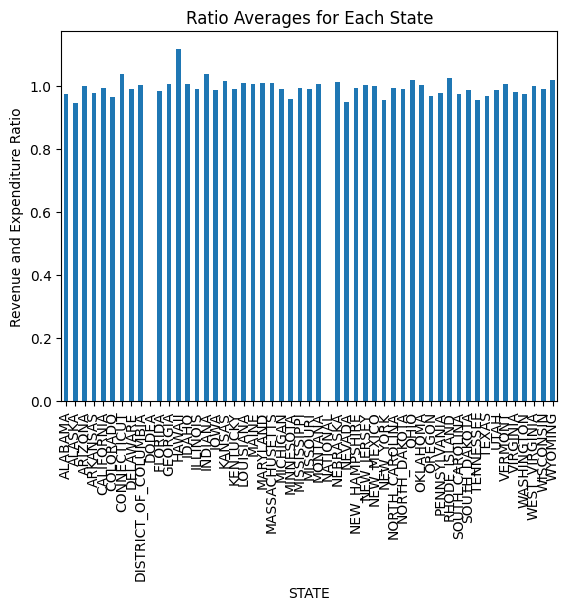

In [143]:
df.groupby('STATE')["REVENUE_EXPENDITURE_RATIO"].mean().plot(kind = "bar")
plt.ylabel('Revenue and Expenditure Ratio')
plt.title('Ratio Averages for Each State')

After plotting the average Revenue to Expenses ratios for each state, the data appears to be homogenous in that spending and expenses is well balanced between each state. This could indicate that federal aid is well at controlling fair aid dispersion. I am still confused how math scores are deviate more than others in different states. I will explore this next.

**Visualization 2**

Text(0.5, 1.0, 'Average Math Score for Each State')

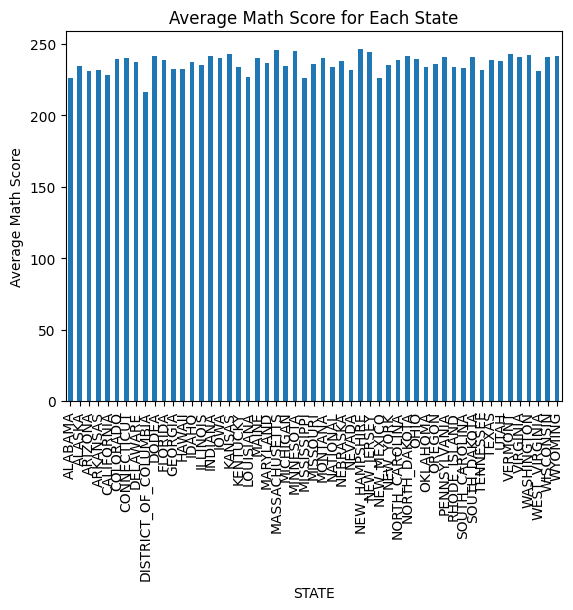

In [145]:
df.groupby('STATE')["AVG_MATH_4_SCORE"].mean().plot(kind = "bar")
plt.ylabel('Average Math Score')
plt.title('Average Math Score for Each State')

After this analysis, there is still homogenous or uniformly distributed data about the states. I think I need to test something else besides grouping by the states categorical variable. 

Text(0, 0.5, 'Average Math Grade 4')

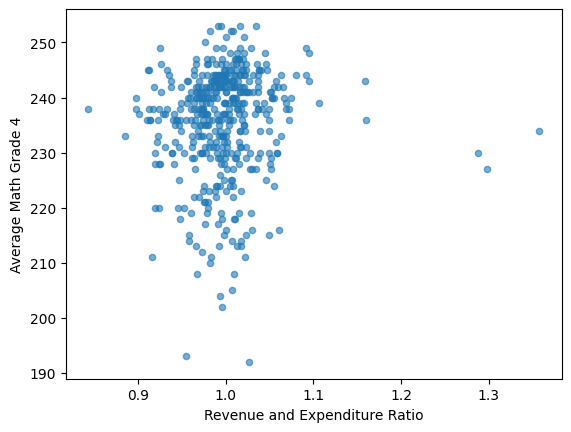

In [146]:
df.plot.scatter(x='REVENUE_EXPENDITURE_RATIO', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('Revenue and Expenditure Ratio')
plt.ylabel('Average Math Grade 4')

In [11]:
from scipy.stats import pearsonr

In [159]:
corr, _ = pearsonr(df['REVENUE_EXPENDITURE_RATIO'].fillna(0), df['AVG_MATH_4_SCORE'].fillna(0))
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.054


After this third and final analysis, I can be certain that this feature I created did not have an impact on Average Math 4 Grade scores along with any discrepancy among states. The correlation coefficient is very small and I think that math scores are very well controlled in standardized testing for grade 4. 

I will do one more analysis to visualize a predictor I could use for the ML model.

Text(0, 0.5, 'Average Math Grade 4')

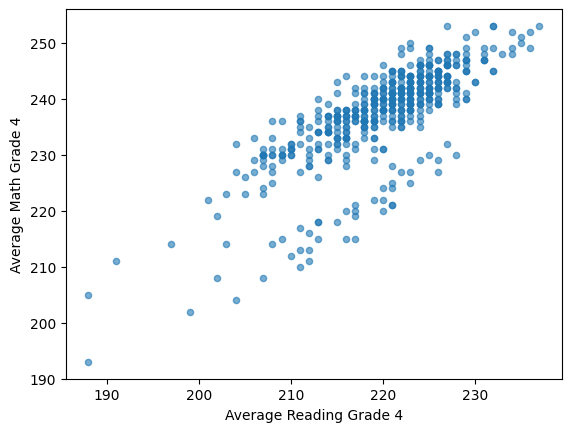

In [9]:
df.plot.scatter(x='AVG_READING_4_SCORE', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('Average Reading Grade 4')
plt.ylabel('Average Math Grade 4')


Finally, I see a strong positive correlation. 

In [12]:
corr, _ = pearsonr(df['AVG_READING_4_SCORE'].fillna(0), df['AVG_MATH_4_SCORE'].fillna(0))
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.796


<h2> Data Creation </h2>

_Use this space to create train/test data_

Since money does not have a lot of impact on scores, I will just focus on similar grade scores for all states. 

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df[['AVG_READING_4_SCORE', 'GRADES_4_G']].dropna()
y = df.loc[X.index]['AVG_MATH_4_SCORE']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size= .3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [22]:
# import your sklearn class here
from sklearn import neighbors


In [60]:
# create your model here
model = neighbors.KNeighborsRegressor(2, weights='distance')

In [61]:
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2, weights='distance')

In [62]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [63]:
model.score(X_test, y_test)

-0.2317346810631422

In [69]:
model.score(X_train, y_train)

1.0

This is odd. It is 100%

In [64]:
np.mean(model.predict(X_test)-y_test)

0.7569529347543935

In [65]:
np.mean((model.predict(X_test)-y_test)**2)**0.5

6.834892982950697

There is so much error, KNN is a bad fit for this model. I should be doing Logistic Regression. 

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

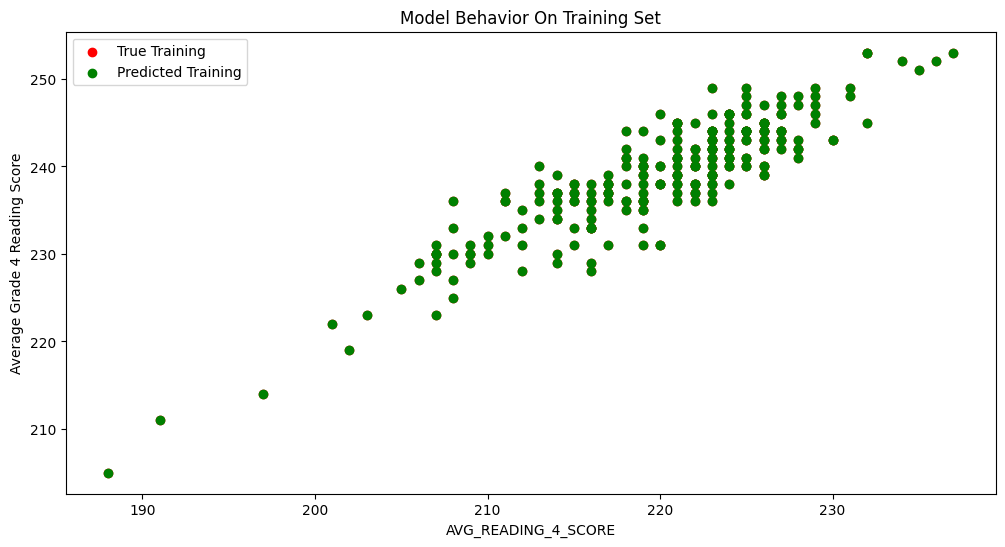

In [66]:
col_name = 'AVG_READING_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Average Grade 4 Reading Score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

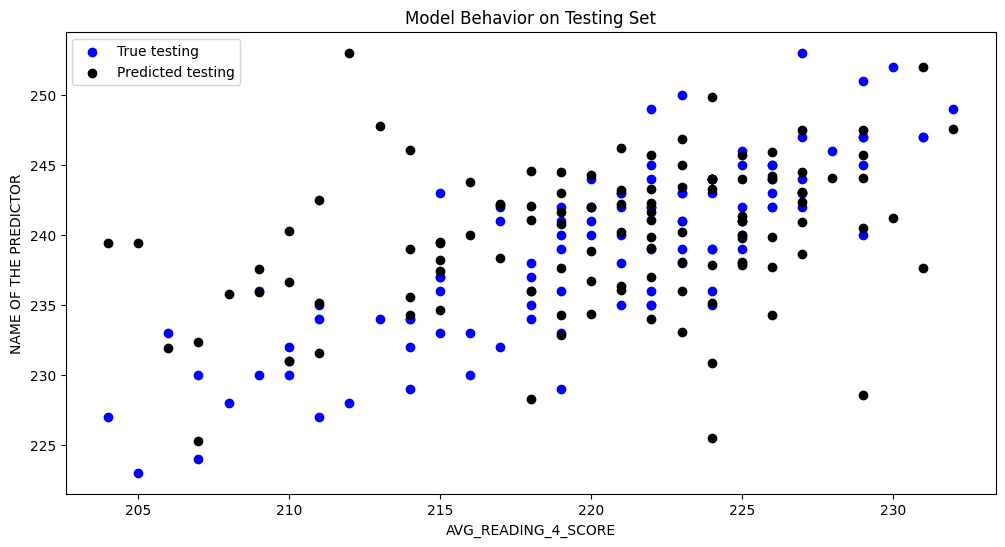

In [68]:
col_name = 'AVG_READING_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

After the ML analysis, I noticed I had poor model prediction along with scoring due to a bad model representation. I think a linear model would have worked well since I am not dealing with a lot of predictors. There is only K = 2 which is perfect for logistic regression. LDA may have been helpful due to the small n in the dataset, but for interpretability, a simple regressor would have done the job especially since grade 4 reading and math scores have a high correlation coefficient of 0.7. 

KNN is used for non-linear data. 

I will say I was surprised to see 100% model fitting score for the training data. The graph for the training errors (graph 1) does not have any red dots because they are layered on top one another. 

If I repeat the analysis I will choose Logistic Regressor. 